# Sub question 5: Health care

Intro

Welke indicator is gebruikt?

Verschil tussen mannen en vrouw in health care. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion



In [4]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy import stats



In [5]:
#import csv van 15 slechtse landen
CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
# CPIA_worst15   

In [2]:
#wbdata.get_source()


In [16]:
#wbdata.get_indicator(source=16)

In [ ]:
# Indicators

# SP.DYN.CONU.ZS      	Contraceptive prevalence, any methods (% of women ages 15-49)
# SP.DYN.TO65.MA.ZS   	Survival to age 65, male (% of cohort)
# SP.DYN.TO65.FE.ZS   	Survival to age 65, female (% of cohort)
# SH.STA.ANVC.ZS      	Pregnant women receiving prenatal care (%)


In [17]:
# # Mortality Rates
# wbdata.get_data("SP.DYN.AMRT.MA")    
# wbdata.get_data("SP.DYN.AMRT.FE") 
# # Surival rates 
# wbdata.get_data("SP.DYN.TO65.MA.ZS")  
# wbdata.get_data("SP.DYN.TO65.FE.ZS")  
# #prenetal care
# wbdata.get_data("SH.STA.ANVC.ZS")
# #contraceptive prevalance
# wbdata.get_data("SP.DYN.CONU.ZS")  


In [11]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    
    CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
    CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
    
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

In [12]:
def graph(dataframe, title_graph, x_label, y_label):
    # visualiseren van verandering per land

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #tekst op x en y-as
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
    return


In [39]:
# Creating the data frames
ContraPrevalance = clean("SP.DYN.CONU.ZS")
Survival65_Male = clean("SP.DYN.TO65.MA.ZS")
Survival65_Female = clean("SP.DYN.TO65.FE.ZS")
PrenatalCare = clean ('SH.STA.ANVC.ZS')

In [25]:
#functie om gemiddelde over de landen te nemen
def mean_countries(dataframe):
    mean = dataframe.groupby('date', as_index=False).mean()
    return mean

In [29]:
# gemiddelde van alle worst 15 landen per jaar voor vrouwen/mannen
mean_Survival65_Male = mean_countries(Survival65_Male)
mean_Survival65_Female = mean_countries(Survival65_Female)

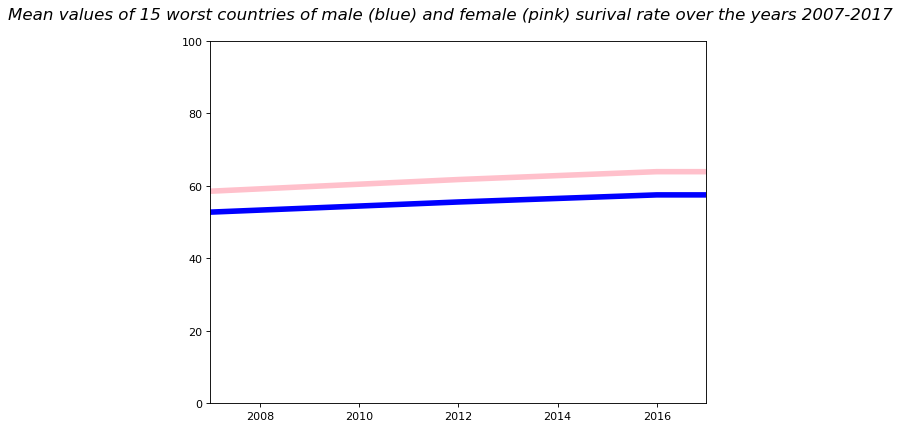

In [35]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = mean_Survival65_Male.date.values
M, F = mean_Survival65_Male.value.values, mean_Survival65_Female.value.values

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, M, color="Blue", linewidth=5.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, F, color="pink", linewidth=5.0, linestyle="-")

# Set x limits
plt.xlim(2007, 2017,1)

# Set x ticks

# Set y limits
plt.ylim(0, 100)

plt.suptitle("Mean values of 15 worst countries of male (blue) and female (pink) surival rate over the years 2007-2017", fontsize=15, fontweight=0, color='black', style='italic', y=0.95)

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

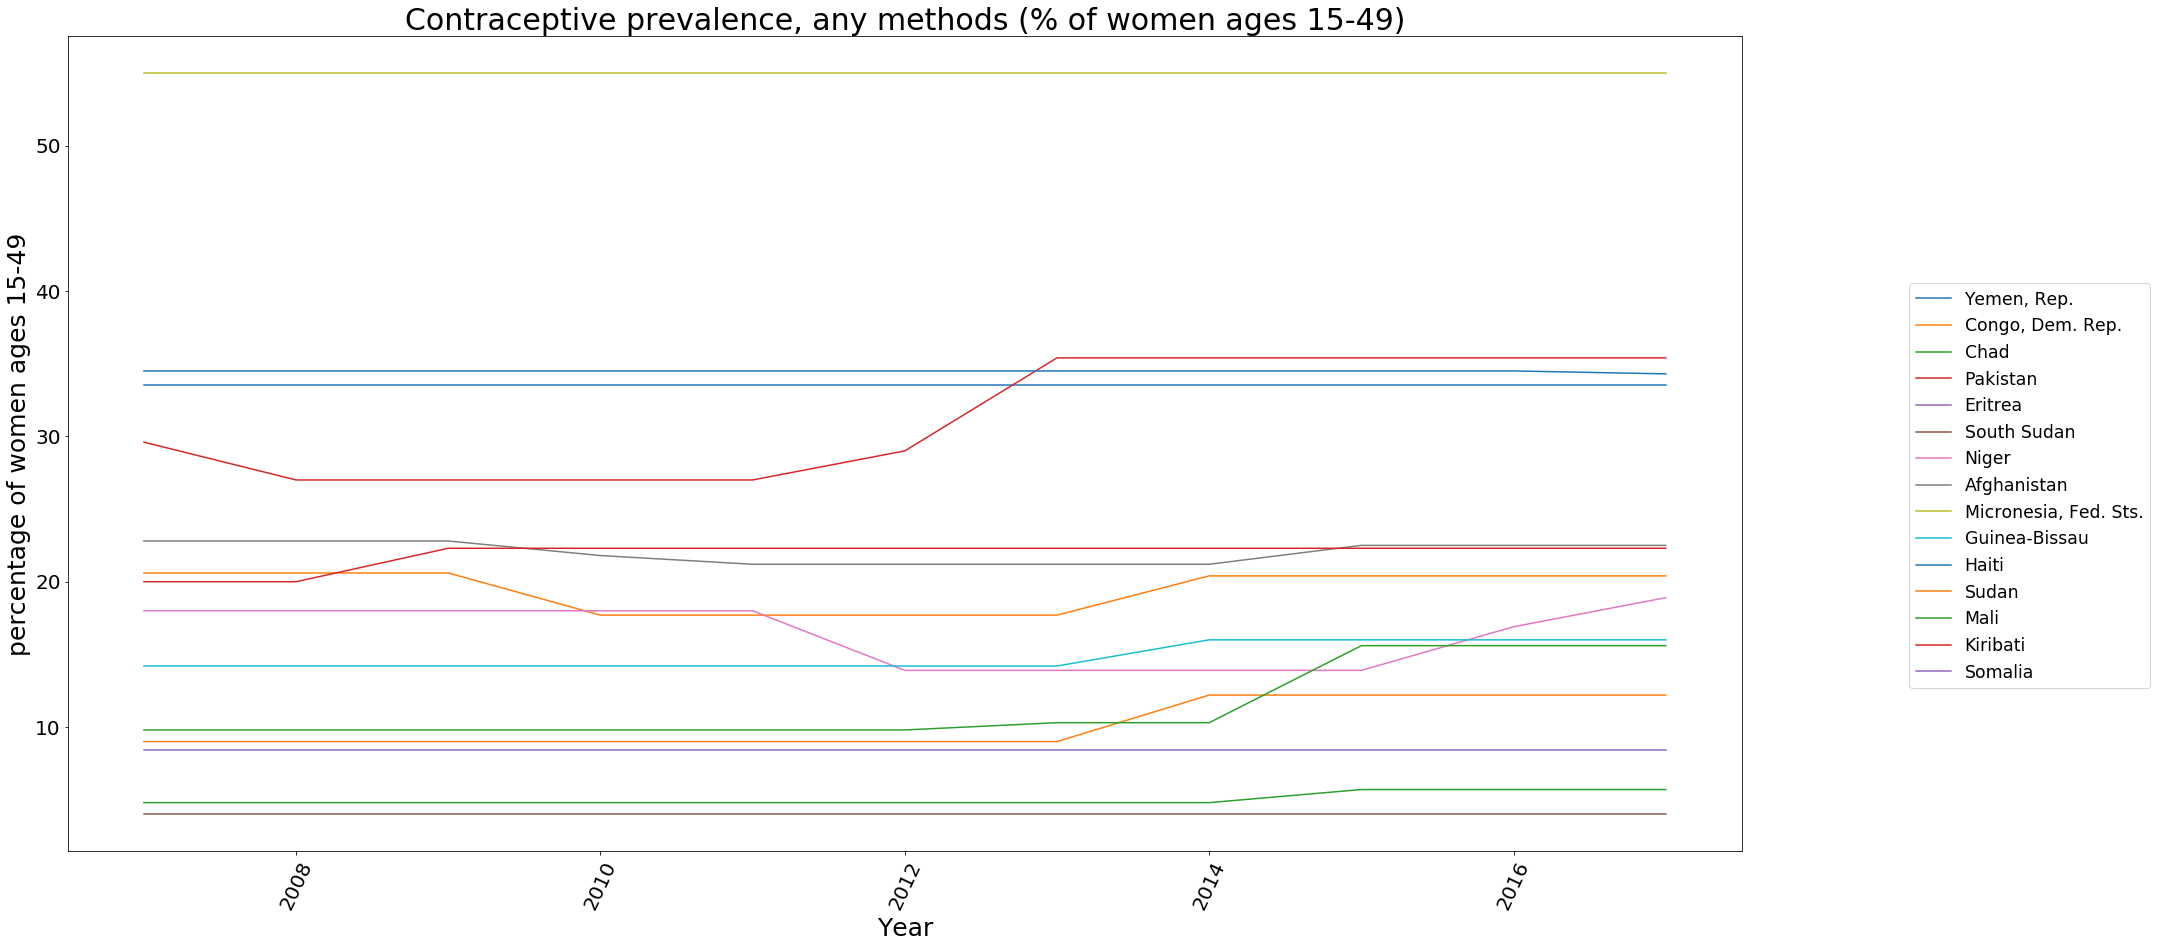

In [40]:
graph(ContraPrevalance,"Contraceptive prevalence, any methods (% of women ages 15-49)","Year", "percentage of women ages 15-49")

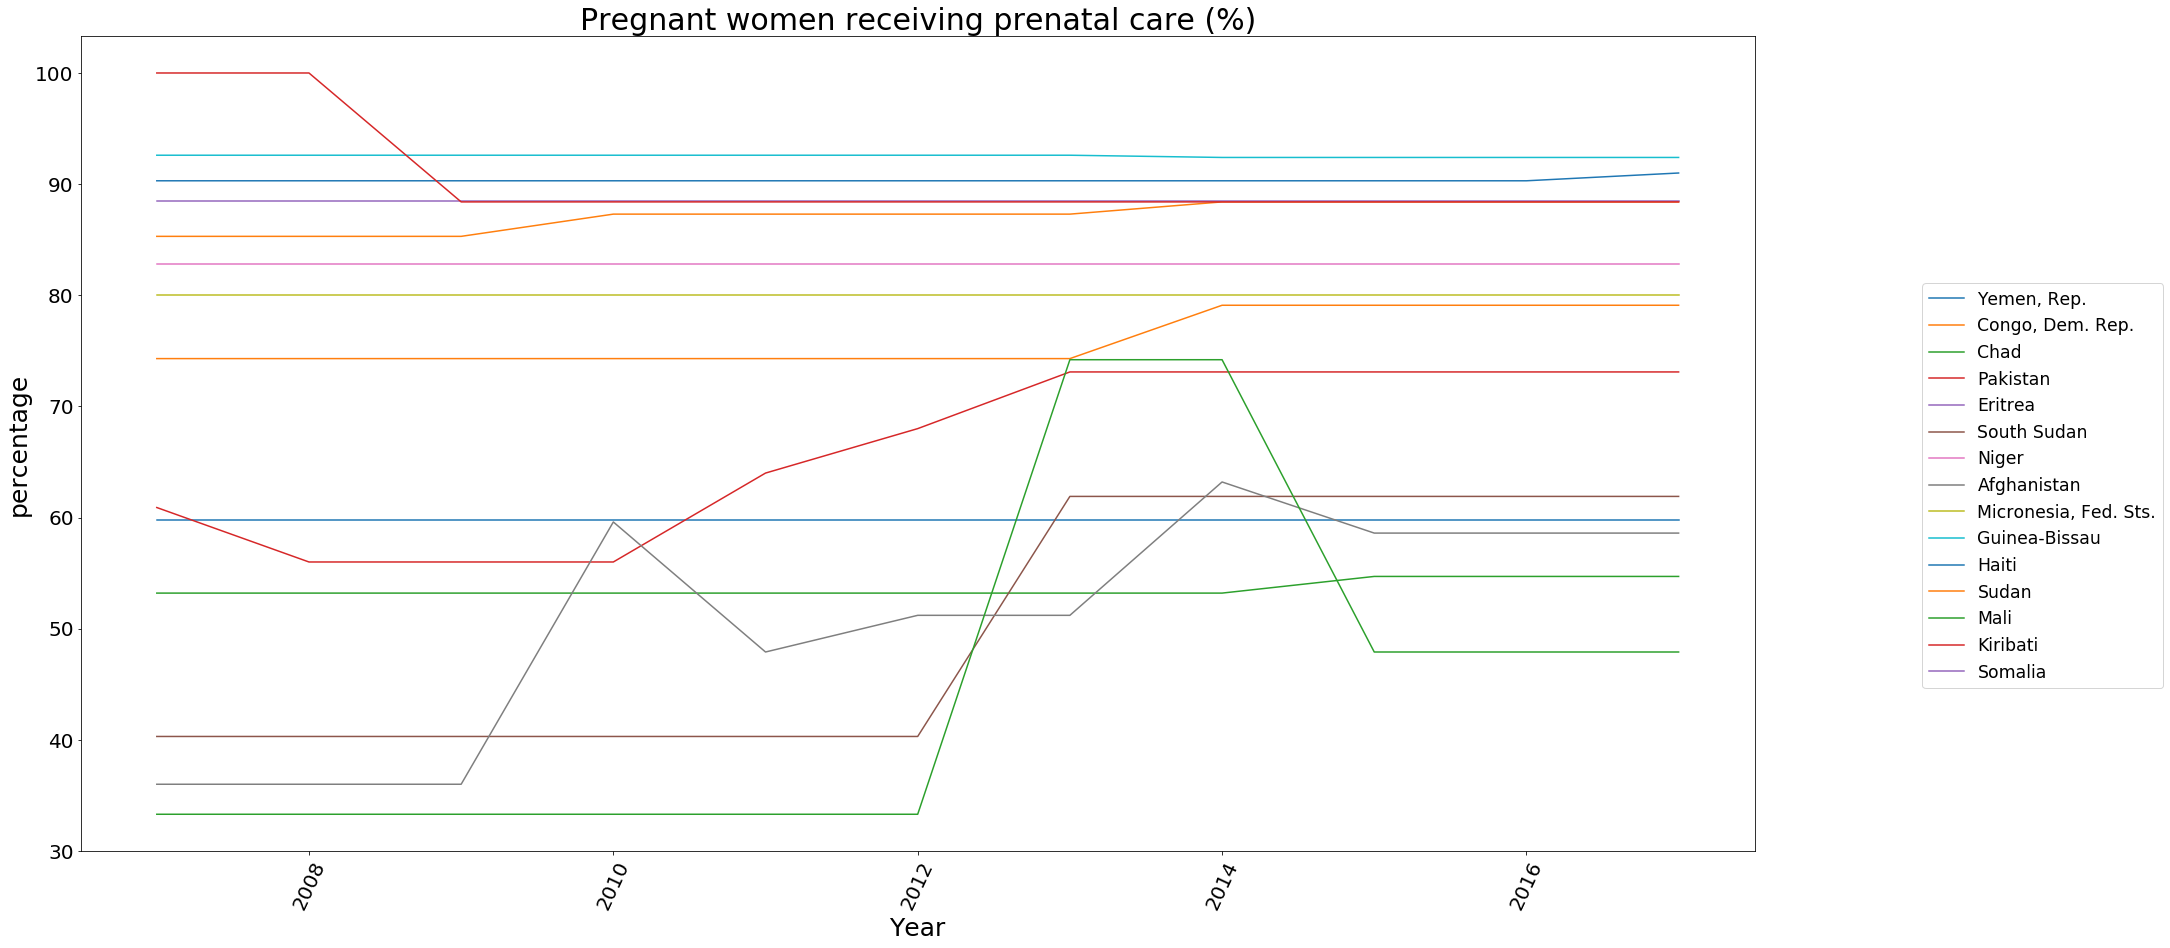

In [41]:
graph(PrenatalCare,"Pregnant women receiving prenatal care (%)","Year", "percentage")

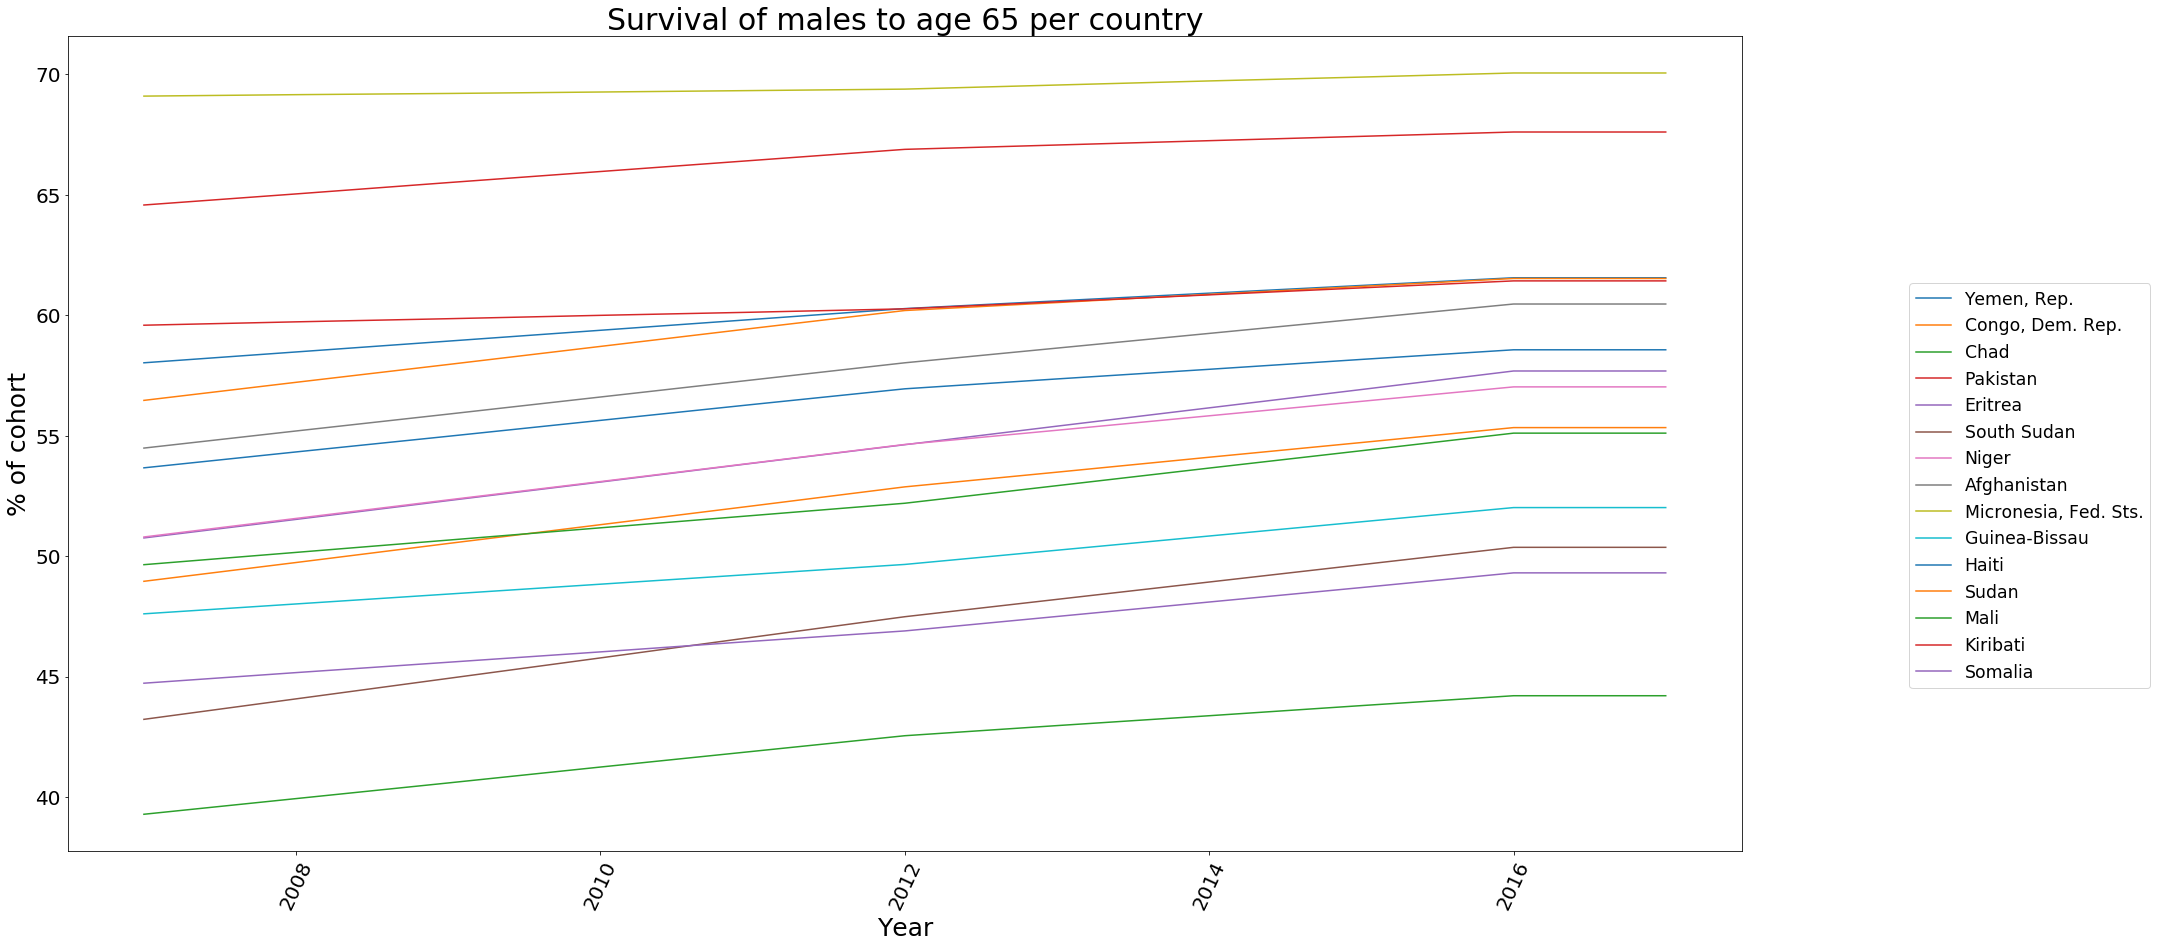

In [43]:
graph(Survival65_Male,"Survival of males to age 65 per country","Year", "% of cohort")

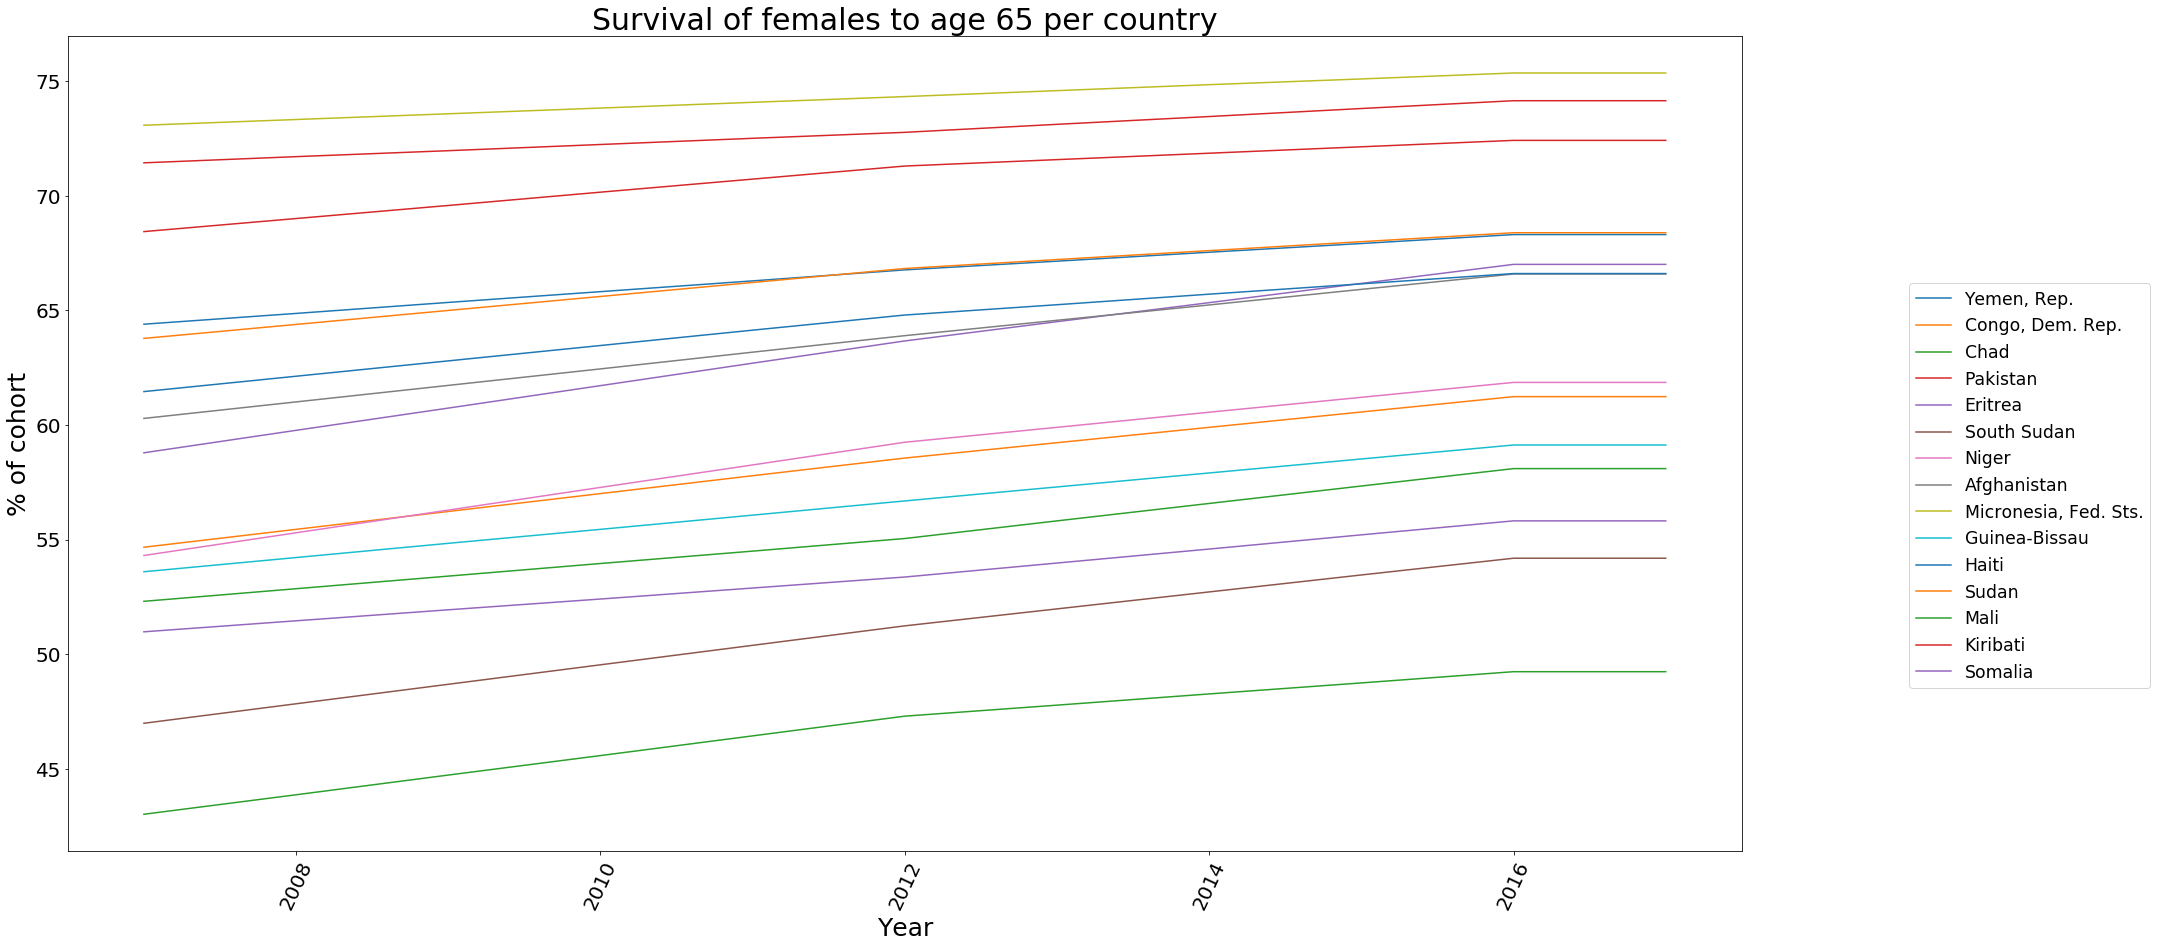

In [44]:
graph(Survival65_Female,"Survival of females to age 65 per country","Year", "% of cohort")